In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
incomplete_df = pd.DataFrame({'id': [1,2,3,2,2,3,1,1,1,2,4],
                              'type': ['one', 'one', 'two', 'three', 'two', 'three', 'one', 'two', 'one', 'three','one'],
                              'amount': [345,928,np.NAN,645,113,942,np.NAN,539,np.NAN,814,np.NAN] 
                             }, columns=['id','type','amount'])
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,NaN
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,NaN
7,1,two,539.0
8,1,one,NaN
9,2,three,814.0


In [3]:
A = incomplete_df['amount']
B = pd.Series(data=[np.NAN,125,335,345,312,np.NAN,np.NAN,129,551,800,222])

In [4]:
print A
print '\n'
print B

0     345.0
1     928.0
2       NaN
3     645.0
4     113.0
5     942.0
6       NaN
7     539.0
8       NaN
9     814.0
10      NaN
Name: amount, dtype: float64


0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


In [5]:
print 'A mean {0}'.format(A.mean())
print 'B summary statistics:'
print B.mean()
print B.min()
print B.max()
print B.var()
print np.ptp(B)

A mean 618.0
B summary statistics:
352.375
125.0
800.0
51485.69642857143
675.0


In [6]:
A+B

0        NaN
1     1053.0
2        NaN
3      990.0
4      425.0
5        NaN
6        NaN
7      668.0
8        NaN
9     1614.0
10       NaN
dtype: float64

## Filling missing values

In [7]:
print A
print '\n'
print A.dropna()

0     345.0
1     928.0
2       NaN
3     645.0
4     113.0
5     942.0
6       NaN
7     539.0
8       NaN
9     814.0
10      NaN
Name: amount, dtype: float64


0    345.0
1    928.0
3    645.0
4    113.0
5    942.0
7    539.0
9    814.0
Name: amount, dtype: float64


In [8]:
A.fillna(-1)

0     345.0
1     928.0
2      -1.0
3     645.0
4     113.0
5     942.0
6      -1.0
7     539.0
8      -1.0
9     814.0
10     -1.0
Name: amount, dtype: float64

In [9]:
A.fillna('missing data')

0              345
1              928
2     missing data
3              645
4              113
5              942
6     missing data
7              539
8     missing data
9              814
10    missing data
Name: amount, dtype: object

In [10]:
A.fillna(A.mean())

0     345.0
1     928.0
2     618.0
3     645.0
4     113.0
5     942.0
6     618.0
7     539.0
8     618.0
9     814.0
10    618.0
Name: amount, dtype: float64

In [11]:
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,NaN
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,NaN
7,1,two,539.0
8,1,one,NaN
9,2,three,814.0


In [12]:
#fill in gaps in the 'amount' column with means obtained from correspondng id's in the first columns
incomplete_df['amount'].fillna(incomplete_df.groupby('id')['amount'].transform('mean'),inplace=True)
print incomplete_df
print '\n'


    id   type  amount
0    1    one   345.0
1    2    one   928.0
2    3    two   942.0
3    2  three   645.0
4    2    two   113.0
5    3  three   942.0
6    1    one   442.0
7    1    two   539.0
8    1    one   442.0
9    2  three   814.0
10   4    one     NaN




In [13]:
#if there are no corresponding ids
incomplete_df['amount'].fillna(incomplete_df['amount'].mean(), inplace=True)
print incomplete_df

    id   type  amount
0    1    one   345.0
1    2    one   928.0
2    3    two   942.0
3    2  three   645.0
4    2    two   113.0
5    3  three   942.0
6    1    one   442.0
7    1    two   539.0
8    1    one   442.0
9    2  three   814.0
10   4    one   615.2


In [14]:
print B
print '\n'
print B.fillna(method='backfill')

0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


0     125.0
1     125.0
2     335.0
3     345.0
4     312.0
5     129.0
6     129.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


In [15]:
B.fillna(method='bfill',limit=1)

0     125.0
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6     129.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64

In [16]:
print B
print '\n'
print B.interpolate()

0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5     251.0
6     190.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


In [17]:
B.interpolate(method='barycentric')

0            NaN
1     125.000000
2     335.000000
3     345.000000
4     312.000000
5     146.563492
6      -1.849206
7     129.000000
8     551.000000
9     800.000000
10    222.000000
dtype: float64

In [18]:
B.interpolate(method='pchip')

0            NaN
1     125.000000
2     335.000000
3     345.000000
4     312.000000
5     246.420420
6     167.376877
7     129.000000
8     551.000000
9     800.000000
10    222.000000
dtype: float64

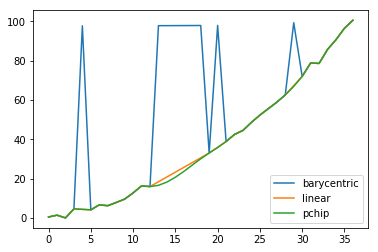

In [26]:
np.random.seed(2)
ser = pd.Series(np.arange(1,10.1,.25)**2 + np.random.randn(37))
bad = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[bad] = np.nan
methods = ['linear','barycentric','pchip']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()